In [44]:
import matplotlib.pyplot as plt
import numpy as np
import m5_helpers
import os
from pylbm import lbm

In [131]:
x_dim = 100
y_dim = 80
epochs = 10000
omega = 0.5
rho_in = 1.01
rho_out = 0.99
path = "./velocities.npy"
if os.path.isfile(path):
    velocities = np.load(path)
else:
    velocities, f_cxy = m5_helpers.m5_1(x_dim=x_dim, y_dim=y_dim, epochs=epochs, omega=omega, rho_in=rho_in, rho_out=rho_out)
    np.save(path, velocities)

In [66]:
font_size = 20
plt.rc('font', size=16) 
plt.rc('axes', titlesize=font_size)
plt.rc('axes', labelsize=font_size)

In [46]:
num_plots = 2
print_epoch = round(epochs / num_plots)
if print_epoch == 0:
    print_epoch = 1

vel_print = []
for t in range(len(velocities)):
    if t % print_epoch == print_epoch-1:
        vel_print.append((velocities[t], t))

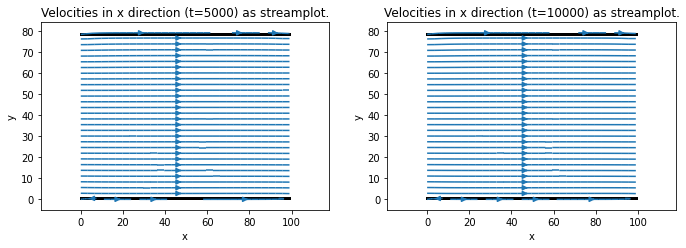

In [12]:
fig = plt.figure(figsize=(30,20))
plt.axis('off')
fig = m5_helpers.m5_1_fig(fig, x_dim=x_dim, y_dim=y_dim, velocities=vel_print)



plt.show()
plt.close()

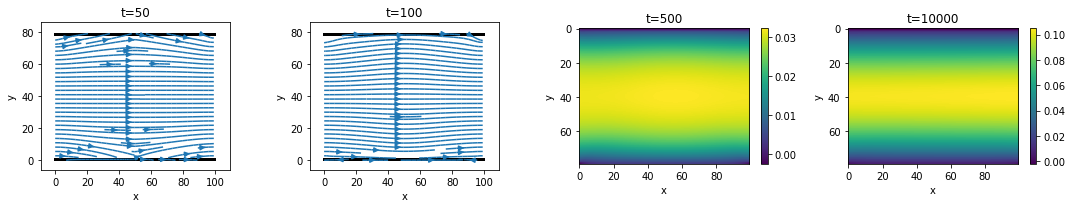

In [5]:
fig, ax = plt.subplots(figsize=(15,3))
plt.axis('off')
axs = fig.subplots(nrows=1, ncols=4)


times =  [50, 100]
for i, t in enumerate(times):
    ax = axs[i]
    ax.set_title("t={}".format(t))
    fig.subplots_adjust(bottom=0, top=1, left=0, right=1)
    ax.plot(np.arange(x_dim), np.zeros((x_dim)) + y_dim - 1.5, color="black", linewidth=3.0)
    ax.plot(np.arange(x_dim), np.zeros((x_dim)) + 0.5, color="black", linewidth=3.0)
    ax.axis("equal")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 80])
    strm = ax.streamplot(np.arange(x_dim), np.arange(y_dim), velocities[t-1][0, :, :].T, velocities[t-1][1, :, :].T, cmap="autumn")

times =  [500, 10000]
for i, t in enumerate(times):
    ax = axs[i+2]
    ax.set_title("t={}".format(t))
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    im = ax.imshow(velocities[t-1][0,:,:].T)
    fig.colorbar(im, ax=ax, fraction=0.036, pad=0.06)

plt.tight_layout()
lbm.save_fig(fig, 'm5-1-vel-time.png')
plt.show()
plt.close()

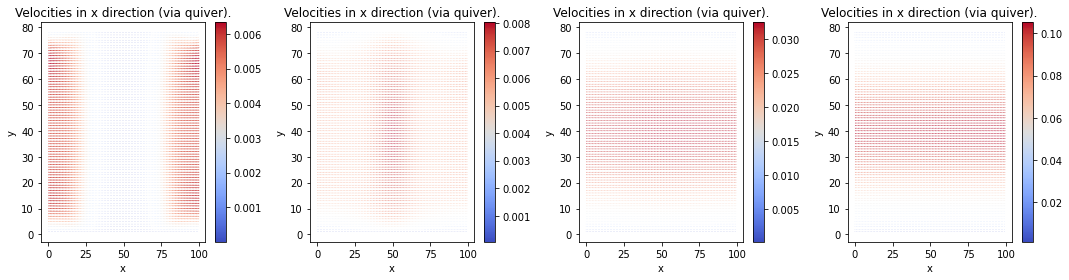

In [23]:
fig, ax = plt.subplots(figsize=(15,4))
plt.axis('off')
axs = fig.subplots(nrows=1, ncols=4)

times = [50,100, 500, 9999]
for i, t in enumerate(times):
    ax = axs[i]

    x = np.arange(x_dim)
    y = np.arange(y_dim)
    X,Y = np.meshgrid(x, y[1:-1])

    ax.set_title("Velocities in x direction (via quiver).")
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    u_axy = velocities[t]
    magnitude = np.sqrt(u_axy[0,:,1:-1]**2 + u_axy[1,:,1:-1]**2)
    quiver = ax.quiver(X,Y, u_axy[0,:,1:-1].T, u_axy[1,:,1:-1].T, magnitude.T, cmap='coolwarm')
    fig.colorbar(quiver, ax=ax)
plt.tight_layout()
plt.show()
plt.close()

In [142]:
omega=0.5
vs_theo = 1/3*(1/omega-0.5)
rho_init = 1.
nu = rho_init * vs_theo

roh_change = (rho_in - rho_out)
N = x_dim-2
h = y_dim-2
dp_dx = roh_change * (1/3) / N # dp/dx ist uberall konstant
y = np.arange(y_dim-1) + 0
u_y = 1/(2 * nu) * (dp_dx) * y * (h-y)

In [138]:
path = "./vel_t_100000.npy"
if not os.path.isfile(path):
    vel_final = m5_helpers.m5_1_only_final(x_dim=x_dim, y_dim=y_dim, epochs=100000, omega=omega, rho_in=rho_in, rho_out=rho_out)
    np.save(path, vel_final)
else:
    vel_final = np.load(path)

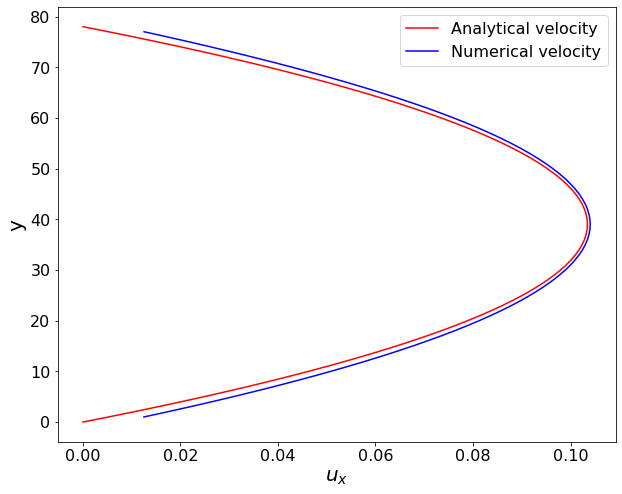

In [152]:
fig, ax = plt.subplots(figsize=(10,8))
# ax.plot(u_axy[0,int(u_axy.shape[1]/2), 1:-1], np.arange(y_dim-2)+0.5)

u_axy = vel_final
ax.plot(u_y, np.arange(y_dim-1), color='red',  label="Analytical velocity")
# ax.plot(u_axy[0,int(u_axy.shape[1]/2), 1:-1], np.arange(y_dim-2)+0.5, color='blue', label="Numerical velocity")
ax.plot(u_axy[0,20, 1:-1], np.arange(y_dim-2)+0.5, color='blue', label="Numerical velocity")
# ax.set_title("Velocities at x_dim/2 (t=100000)".format(epochs))
ax.set_xlabel('$u_{x}$')
ax.set_ylabel('y')
ax.legend()

lbm.save_fig(fig, 'm5-1-num-theo.pgf')
plt.show()
plt.close()

# wichtig die richtige boundry anzugeben.